In [1]:
# 파일 다운받기
!wget http://bit.ly/fruits_300_data -O fruits_300.npy

--2023-05-14 13:40:33--  http://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-05-14 13:40:34--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-05-14 13:40:34--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [2]:
# 데이터 읽기
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [3]:
# PCA 객체 생성
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)
pca.fit(fruits_2d)

print(pca.components_.shape)

(50, 10000)


In [4]:
# 이미지 그리는 함수 (한줄에 10개씩 10개 그리기)
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
  n = len(arr)

  rows = int(np.ceil(n / 10))
  cols = n if rows < 2 else 10

  fig, axs = plt.subplots(rows, cols, figsize = (cols*ratio, rows*ratio), squeeze=False)

  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i,j].imshow(arr[i*10+j], cmap='gray_r')
      axs[i,j].axis('off')

  plt.show()


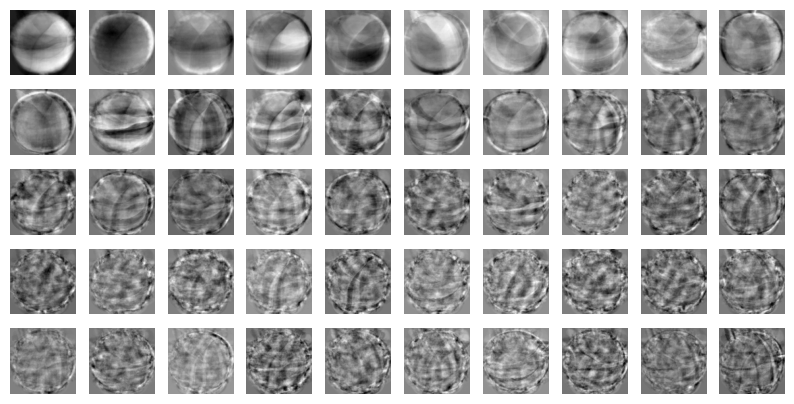

In [5]:
# 주성분 그리기
draw_fruits(pca.components_.reshape(-1, 100, 100))

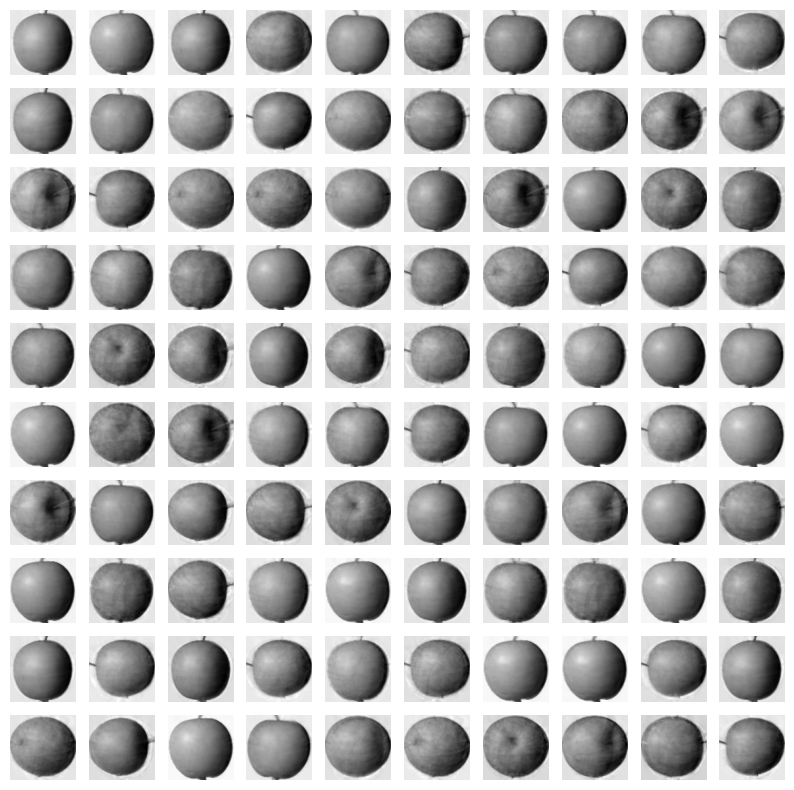

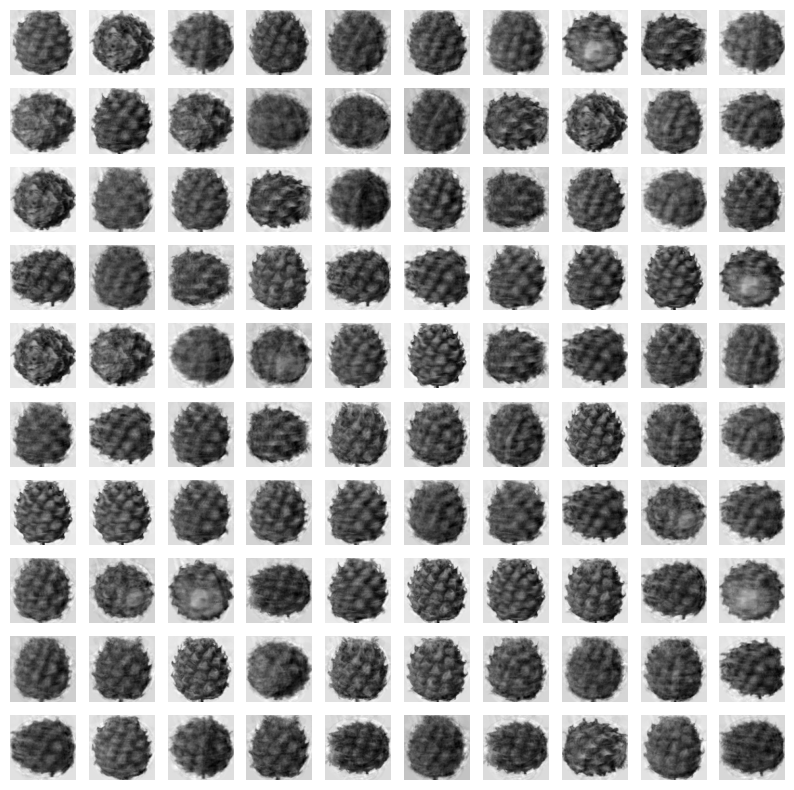

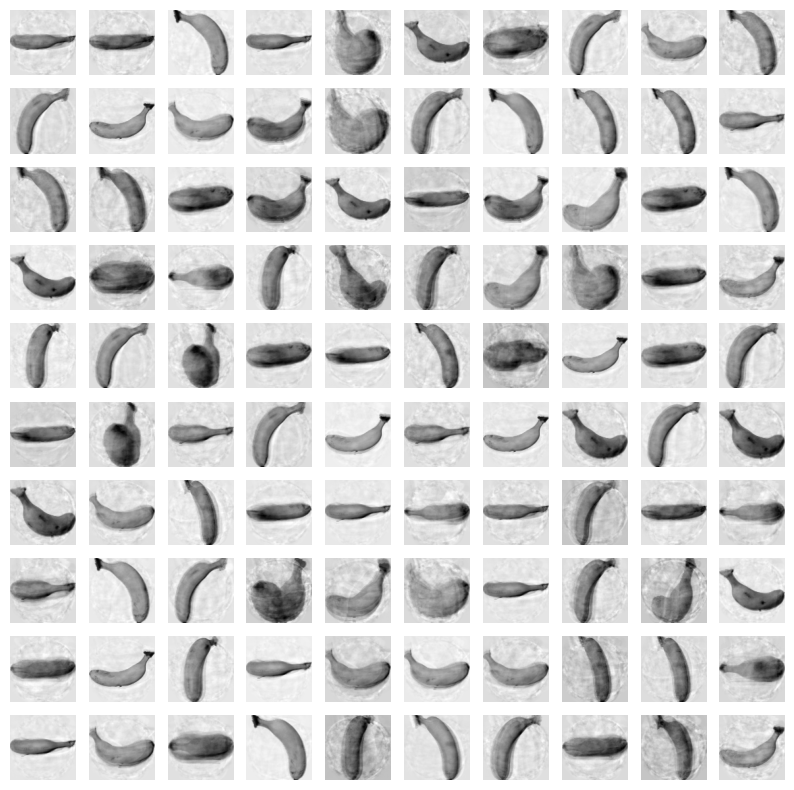

In [6]:
# pca 변환 & 원본 데이터로 다시 변환
fruits_pca = pca.transform(fruits_2d)

fruits_inverse = pca.inverse_transform(fruits_pca)

fruits_reconstruction = fruits_inverse.reshape(-1, 100, 100)

for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruction[start:start+100])
  print("\n")

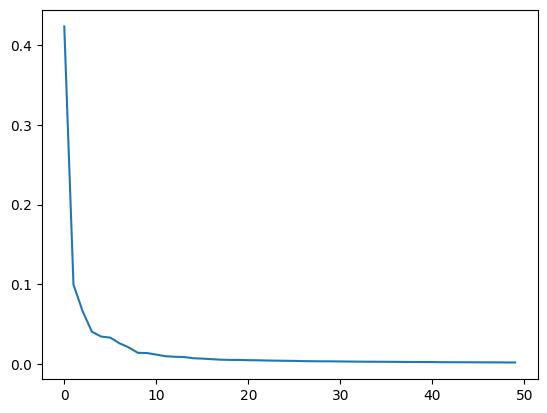

In [7]:
# 설명된 분산 그리기
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [8]:
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# 타깃 데이터 준비
target = np.array([0]*100 + [1]*100 + [2]*100)

# 교차검증 수행
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
2.4033241748809813


In [9]:
# 주성분 분석한 데이터로 교차검증
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.030958271026611327


In [10]:
# 주성분 분석 개수 재지정
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

print(pca.n_components_)

2


In [11]:
# 주성분 분석 변환
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

# 교차 검증
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

(300, 2)
0.9933333333333334
0.03758707046508789


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [12]:
# 클러스터
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state = 42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


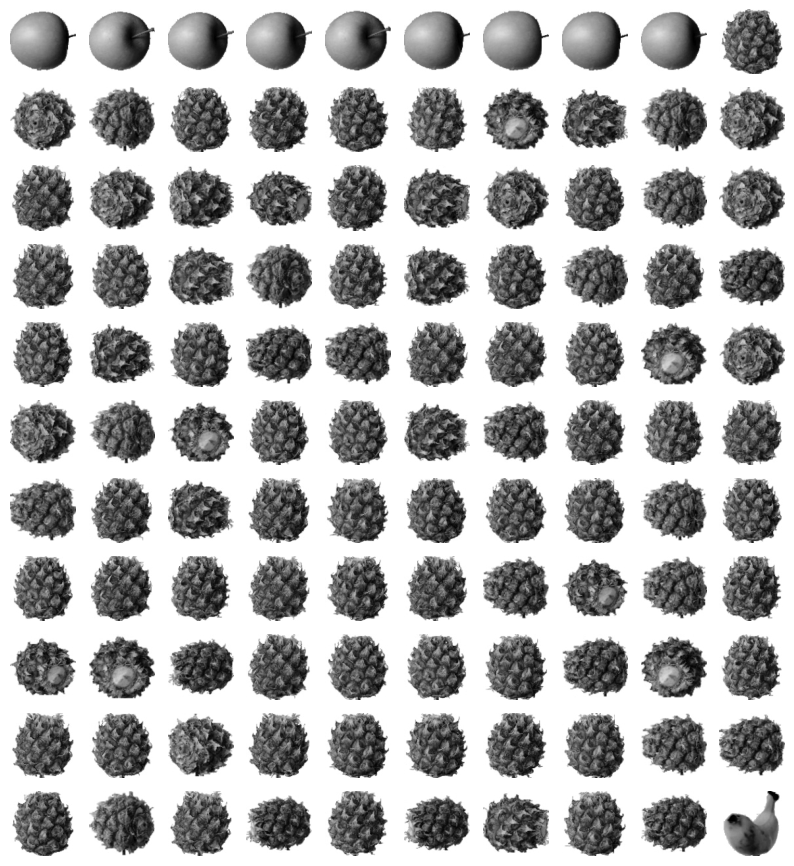

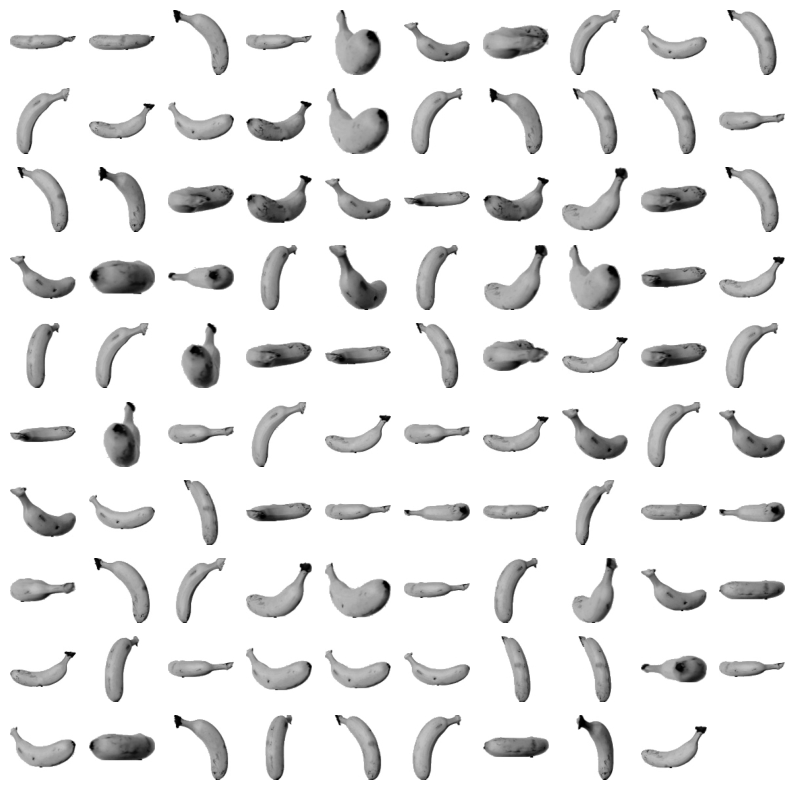

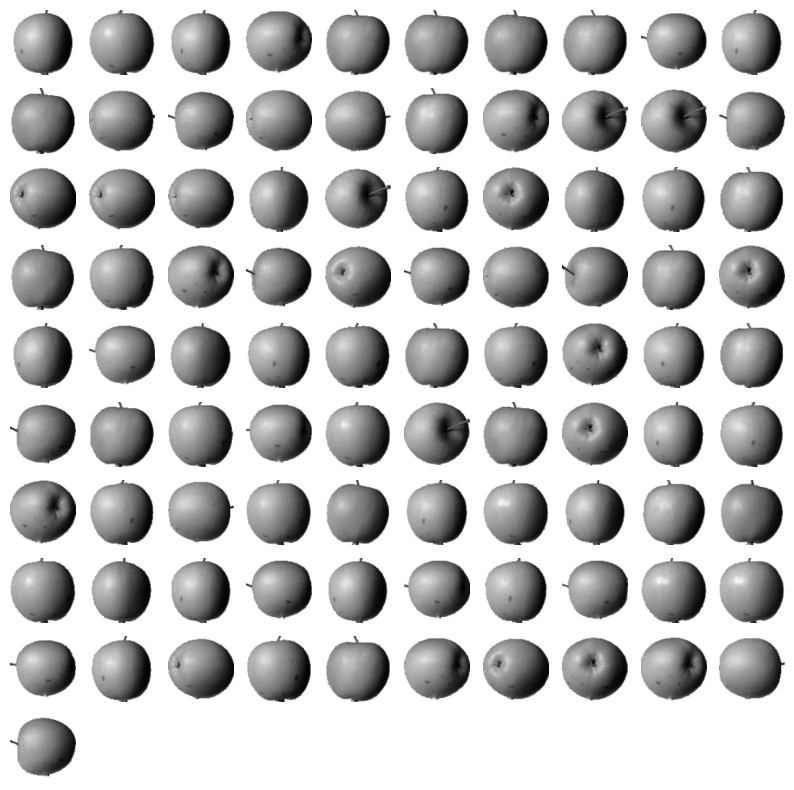

In [13]:
for label in range(0, 3):
  draw_fruits(fruits[km.labels_ == label])
  print("\n")

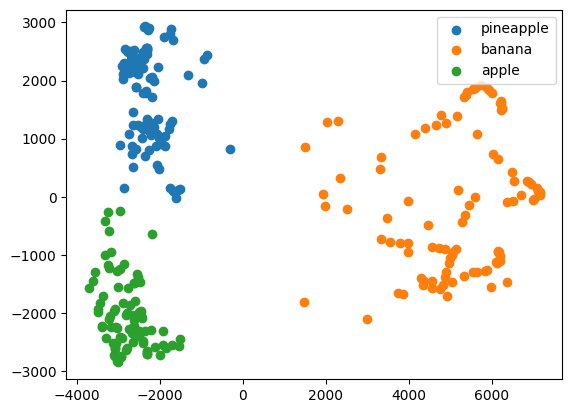

In [14]:
for label in range(0,3):
  data = fruits_pca[km.labels_==label]
  plt.scatter(data[:, 0], data[:, 1])
plt.legend(['pineapple', 'banana', 'apple'])
plt.show()